In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import math

In [3]:
WIDTH = 43200
HEIGHT = 21600
data = np.memmap("../../data/gl-latlong-1km-landcover.bsq", shape=(HEIGHT,WIDTH))
data.shape

(21600, 43200)

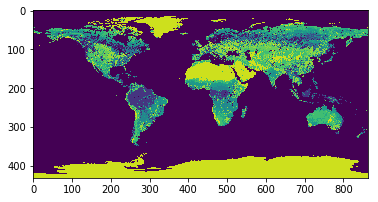

In [4]:
plt.imshow(data[::50,::50])

In [5]:
LAT_PIXEL_SIZE = 0.00833
LON_PIXEL_SIZE = 0.00833

In [6]:
def geo_point_to_pixel(lat,lon):
    lat_ratio = (lat-90)/180
    lon_ratio = (lon+180)/360
    pixel_x = math.floor(-(HEIGHT-1)*lat_ratio)
    pixel_y = math.floor((WIDTH-1)*lon_ratio)
    return (pixel_x, pixel_y)

def get_place_type(place_type):
    if (place_type == 0):
        return 'Water'
    else:
        return 'Land'

In [7]:
colnames=['DATE TIME','LAT', 'LON', 'PROF','MAGNITUDE', 'FONTE'] 
df = pd.read_csv('../../data/events_4.5.txt', skiprows=7, delimiter=';', names=colnames,index_col=False)
df.head()

,DATE TIME,LAT,LON,PROF,MAGNITUDE,FONTE
0,2014-03-05 12:49:21.600,38.159,20.272,10.0,4.8,SURVEY
1,2014-02-15 07:31:17.800,38.340,20.280,2.0,4.9,SURVEY
2,2014-02-14 03:38:01.000,38.260,20.290,10.0,4.7,SURVEY
3,2014-02-09 08:23:02.000,38.280,20.290,10.0,4.5,AGENDA
4,2014-02-06 19:20:59.340,38.120,20.339,6.4,4.6,SURVEY


In [8]:
place_types = []
for index, row in df.iterrows():
    place_type = data[geo_point_to_pixel(row['LAT'],row['LON'])]
    place_types.append(get_place_type(place_type))

df['PLACE_TYPE'] = pd.Series(place_types)
df.head()

,DATE TIME,LAT,LON,PROF,MAGNITUDE,FONTE,PLACE_TYPE
0,2014-03-05 12:49:21.600,38.159,20.272,10.0,4.8,SURVEY,Water
1,2014-02-15 07:31:17.800,38.340,20.280,2.0,4.9,SURVEY,Water
2,2014-02-14 03:38:01.000,38.260,20.290,10.0,4.7,SURVEY,Water
3,2014-02-09 08:23:02.000,38.280,20.290,10.0,4.5,AGENDA,Water
4,2014-02-06 19:20:59.340,38.120,20.339,6.4,4.6,SURVEY,Water


In [9]:
df.to_csv('../../data/modified_earthquake_events.csv',sep=';',index=False)